In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#from acquire import get_telco_data
#from prepare import telco_prep
import acquire
import explore
import prepare

In [44]:
# acquire

In [45]:
df = acquire.get_telco_data()
print(df.shape)
df.head()


(7043, 24)


,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
1,1,1,4,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Credit card (automatic),Month-to-month,DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Electronic check,Month-to-month,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,Month-to-month,DSL
4,1,1,3,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Bank transfer (automatic),Month-to-month,DSL


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
payment_type_id             7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [47]:
df.nunique()

internet_service_type_id       3
contract_type_id               3
payment_type_id                4
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
payment_type                   4
contract_type                  3
internet_service_type          3
dtype: int64

In [48]:
df.describe(include='all')

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
count,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,7043,2,NaN,2,2,NaN,2,...,3,3,3,2,NaN,6531,2,4,3,3
top,NaN,NaN,NaN,6627-CFOSN,Male,NaN,No,No,NaN,Yes,...,No,No,No,Yes,NaN,20.2,No,Electronic check,Month-to-month,Fiber optic
freq,NaN,NaN,NaN,1,3555,NaN,3641,4933,NaN,6361,...,3473,2810,2785,4171,NaN,11,5174,2365,3875,3096
mean,1.872923,1.690473,2.315633,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,...,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN
std,0.737796,0.833755,1.148907,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,...,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,1.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,...,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2.000000,3.000000,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN


In [49]:
# Print a concise summary of our telco df - the column dtypes, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
payment_type_id             7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

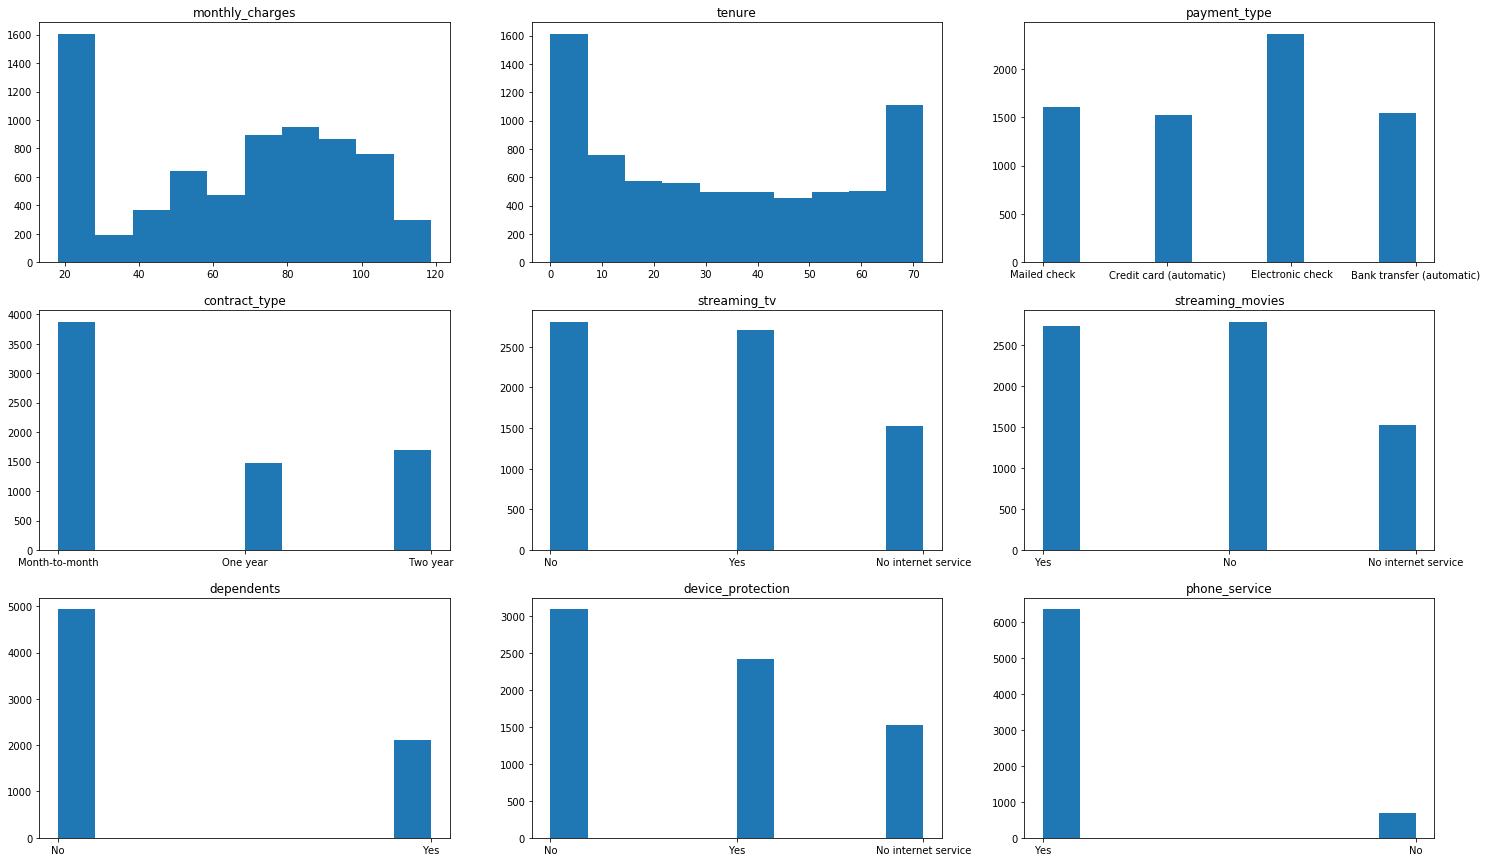

In [50]:
# Plot distribution with subplots of histograms of features

# sets size
plt.subplots(figsize=(25, 15))


plt.subplot(3,3,1);
line1 = plt.hist(df.monthly_charges)
plt.title('monthly_charges');

plt.subplot(3,3,2);
line2 = plt.hist(df.tenure);
plt.title('tenure');

plt.subplot(3,3,3);
line3 = plt.hist(df.payment_type);
plt.title('payment_type');

plt.subplot(3,3,4);
line4 = plt.hist(df.contract_type);
plt.title('contract_type');

plt.subplot(3,3,5);
line1 = plt.hist(df.streaming_tv)
plt.title('streaming_tv');

plt.subplot(3,3,6);
line2 = plt.hist(df.streaming_movies);
plt.title('streaming_movies');

plt.subplot(3,3,7);
line3 = plt.hist(df.dependents);
plt.title('dependents');

plt.subplot(3,3,8);
line4 = plt.hist(df.device_protection);
plt.title('device_protection');

plt.subplot(3,3,9);
line4 = plt.hist(df.phone_service);
plt.title('phone_service');

In [51]:
# Splitting the data from our prepare function
# Verifying the correct ratios of train, validate and test
train, validate, test = prepare.split(df)
print(train.shape, validate.shape, test.shape)

(3943, 24) (1691, 24) (1409, 24)


In [52]:
train.head()

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
4604,2,2,4,1004-NOZNR,Male,1,No,Yes,56,Yes,...,No,Yes,Yes,No,94.80,5264.3,No,Credit card (automatic),One year,Fiber optic
5566,3,1,2,1051-GEJLJ,Female,0,No,No,2,Yes,...,No internet service,No internet service,No internet service,No,19.50,27.55,No,Mailed check,Month-to-month,None
6204,3,2,2,4632-PAOYU,Male,0,Yes,Yes,22,Yes,...,No internet service,No internet service,No internet service,No,19.95,433.5,No,Mailed check,One year,None
5837,3,1,2,5868-YTYKS,Male,0,No,Yes,1,Yes,...,No internet service,No internet service,No internet service,Yes,20.25,20.25,No,Mailed check,Month-to-month,None
1276,1,2,3,0895-LMRSF,Male,0,No,No,23,Yes,...,No,Yes,Yes,Yes,64.90,1509.8,No,Bank transfer (automatic),One year,DSL


In [30]:
# prep

In [31]:
df = prepare.telco_prep(df)

Added feature for tenure in years.
Converted total_charges to float for easier manipulation.


In [32]:
# Exploration

In [33]:
# Does a streaming service type increase customer loyalty? 
#- Null Hypothesis: Churn is independent of streaming services.`  
#- Alternative Hypothesis: Customers with streaming services are more likely to churn.` 

# Splitting the data from our prepare function
# Verifying the correct ratios of train, validate and test
train, validate, test = prepare.split(df)
print(train.shape, validate.shape, test.shape)

(3943, 25) (1691, 25) (1409, 25)


In [40]:


# setting alpha value
a = .01

# creating a cross tab of customers with/without streaming movies and is/is not churned
observed1 = pd.crosstab(train.streaming_movies, train.churn)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < a:
    print('\nP is less than alpha. We reject the null hypothesis.')

Observed

[[1822  599]
 [1074  448]]
---
Expected

[[1778.14253107  642.85746893]
 [1117.85746893  404.14253107]]
---

chi^2 = 10.3146
p     = 0.0013

P is less than alpha. We reject the null hypothesis.


In [41]:
# for reference on layout of observed table
observed1

churn,No,Yes
streaming_movies,,
0,1822,599
1,1074,448


In [17]:
# Modeling

In [18]:
# establish a baseline